In [1]:
import src.lightcurve as lcu
import src.utils as u

import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

In [91]:

DIR = f"/home/danilo/Projects/better_tesi"

LIGHTCURVE_FILE_PATH = f"{DIR}/data/1232/raw/lightcurve8A.txt"
BOUNDS_FILE = f"{DIR}/data/1232/interim/bounds/bounds_30.txt"

### Reads LightCurve

<AxesSubplot:xlabel='Time [s]', ylabel='Count rate [counts/s]'>

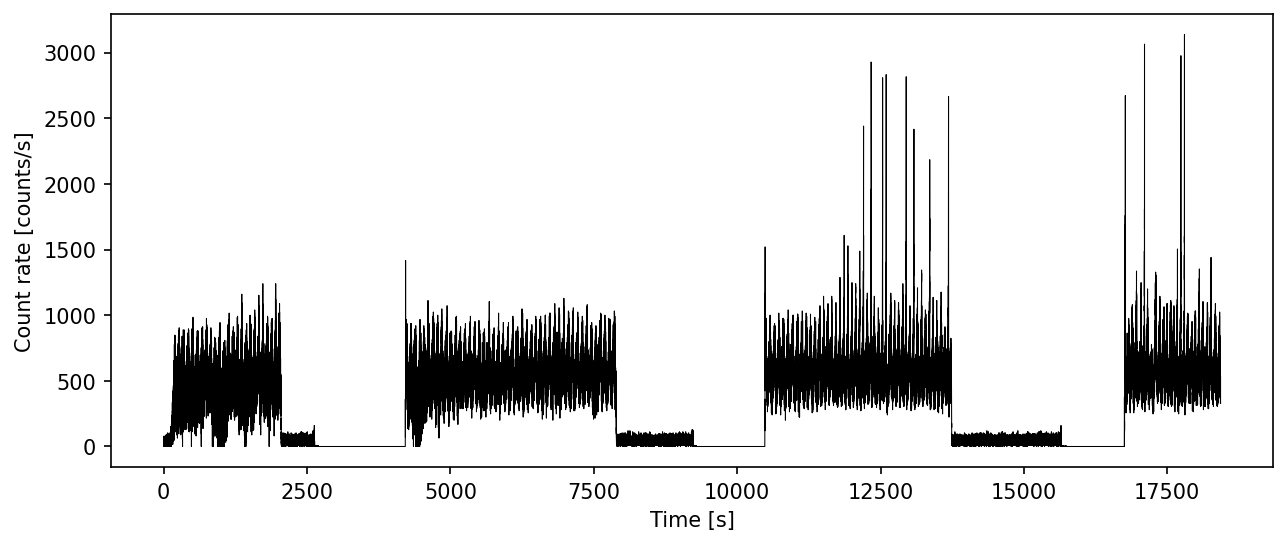

In [92]:
data = np.loadtxt(LIGHTCURVE_FILE_PATH, skiprows=2)
lc = lcu.LightCurve(data[:, 0], data[:, 1])
lcu.plot_lc(lc)

### Reads Bounds

In [93]:
time_bounds = np.loadtxt(BOUNDS_FILE)
time_bounds

array([ 4654.,  4726.,  4802.,  4877.,  4964.,  5040.,  5126.,  5200.,
        5284.,  5369.,  5454.,  5533.,  5615.,  5702.,  5783.,  5867.,
        5946.,  6032.,  6113.,  6195.,  6278.,  6357.,  6438.,  6517.,
        6598.,  6680.,  6760.,  6844.,  6923.,  7007.,  7083.,  7165.,
        7248.,  7327.,  7408.,  7488.,  7565.,  7646.,  7724.,  7807.,
       10532., 10599., 10682., 10756., 10837., 10916., 11001., 11081.,
       11159., 11235., 11305., 11388., 11463., 11537., 11600., 11678.,
       11749., 11820., 11887., 11954., 12022., 12093., 12154., 12221.,
       12294., 12351., 12417., 12492., 12553., 12613., 12705., 12767.,
       12844., 12904., 12962., 13034., 13097., 13172., 13239., 13310.,
       13372., 13438., 13512., 13583., 13646., 13700., 16863., 16911.,
       16985., 17065., 17114., 17182., 17247., 17324., 17393., 17462.,
       17515., 17578., 17632., 17691., 17756., 17815., 17880., 17951.,
       18010., 18077., 18144., 18222., 18282., 18371., 18428.])

In [100]:
def time_to_position(t):
    pos = np.where(lc.time == t)[0]
    if pos.shape[0] == 0:
        return None
    return pos[0]

In [101]:
positional_bounds = list(map(time_to_position, time_bounds))
positional_bounds = [p for p in positional_bounds if p is not None]

lc_cycles = lcu.cut_lc(lc, positional_bounds)


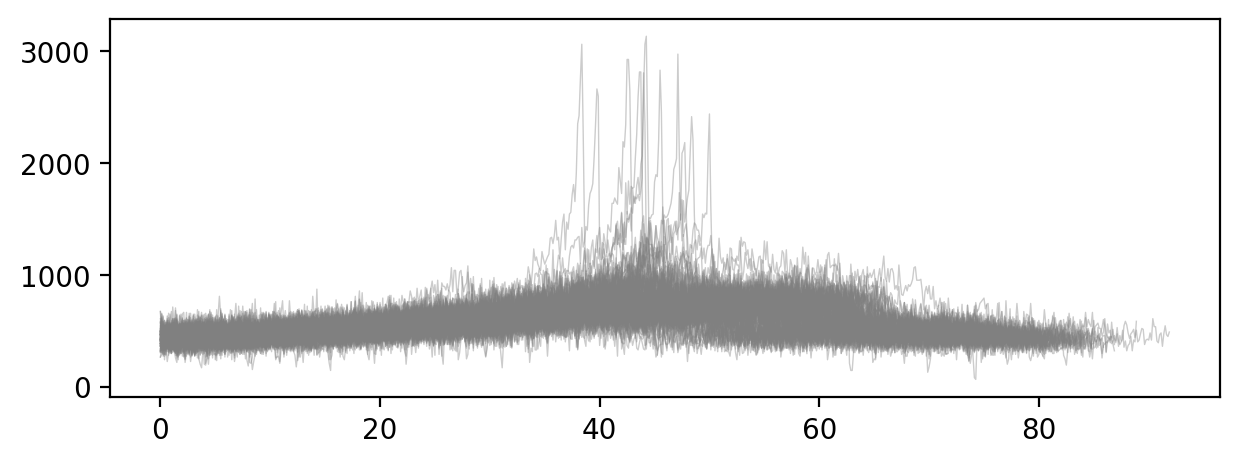

In [108]:
fig, ax = plt.subplots(figsize=(7.16, 2.5), dpi=200)

for lc in lc_cycles:
    plt.plot(lc.time - lc.time[0], lc.photon_rate,
    lw=0.5,
color='gray',
alpha=0.4)

plt.show()


<AxesSubplot:>

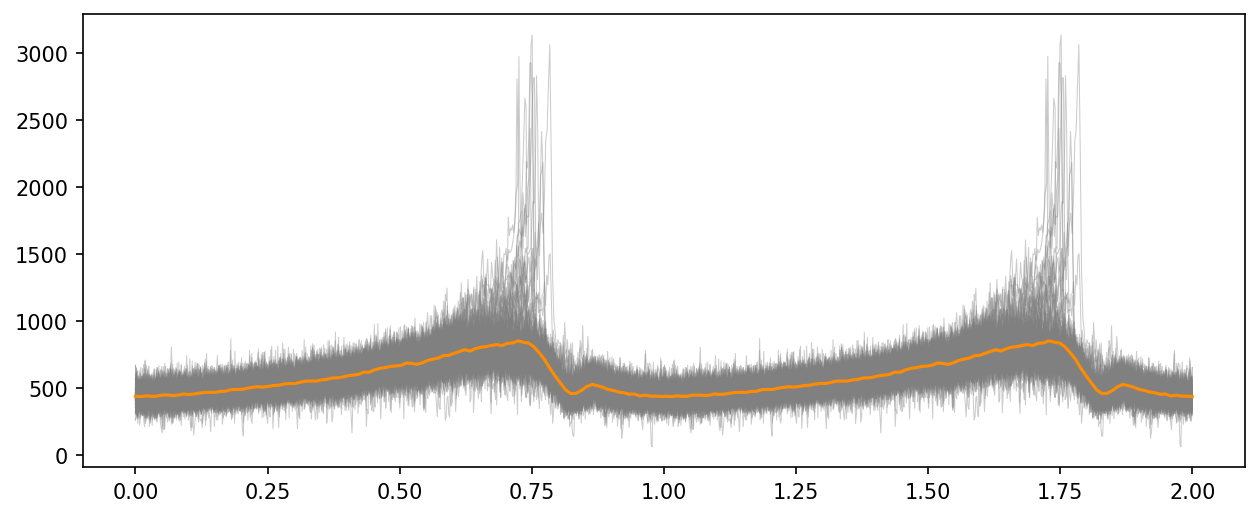

In [105]:
lcu.plot_lc_cycles(lc_cycles)